# Import Libraries

In [70]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 


from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans

In [3]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram



# Call pickle

In [4]:
with open('predictors_processed.pkl', 'rb') as f:
    predictors = pickle.load(f)

In [5]:
with open('fifa_processed.pkl', 'rb') as f:
    fifa = pickle.load(f)

In [14]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,South America
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,1,5.0,4.0,5.0,Normal,1,ST,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000,High,Low,Forward,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,Europe
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,South America
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909,Medium,Medium,GoalKeeper,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,Europe
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,Europe


In [10]:
predictors.head()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder
0,31,94,94,2202,0,5.0,4.0,4.0,1,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,2.242424,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,33,94,94,2228,1,5.0,4.0,5.0,1,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,2.520000,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,26,92,93,2143,1,5.0,5.0,5.0,1,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,2.233333,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,27,91,93,1471,1,4.0,3.0,1.0,1,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,2.090909,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,27,91,92,2281,1,4.0,5.0,4.0,1,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,2.090909,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [13]:
#Drop unimportant features for recommendation
predictors = predictors.drop(['Jersey Number','Loaned From', 'Joined','Contract Valid Until'], axis = 1)

In [15]:
predictors.head()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,...,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder
0,31,94,94,2202,0,5.0,4.0,4.0,1,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,...,2.242424,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,33,94,94,2228,1,5.0,4.0,5.0,1,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,...,2.520000,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,26,92,93,2143,1,5.0,5.0,5.0,1,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,...,2.233333,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,27,91,93,1471,1,4.0,3.0,1.0,1,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,...,2.090909,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,27,91,92,2281,1,4.0,5.0,4.0,1,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,...,2.090909,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [24]:
len(predictors.columns)

121

In [35]:
numeric_cols=['Age', 'Overall','Potential','Special','International Reputation', 'Weak Foot', 'Skill Moves',
               'Height', 'Weight','LS','ST','RS',  'LW',  'LF',  'CF',  'RF',  'RW',  'LAM',  'CAM',  'RAM', 
               'LM',  'LCM',  'CM',  'RCM',  'RM',  'LWB',  'LDM',  'CDM',  'RDM',  'RWB',  'LB',  'LCB',  'CB',
               'RCB',  'RB',  'Crossing',  'Finishing',  'HeadingAccuracy',  'ShortPassing',  'Volleys', 
               'Dribbling',  'Curve',  'FKAccuracy',  'LongPassing',  'BallControl',  'Acceleration',  
               'SprintSpeed',  'Agility',  'Reactions',  'Balance',  'ShotPower',  'Jumping',  'Stamina',  
               'Strength',  'LongShots',  'Aggression',  'Interceptions',  'Positioning',  'Vision',  
               'Penalties',  'Composure',  'Marking',  'StandingTackle',  'SlidingTackle',  'GKDiving',  
               'GKHandling',  'GKKicking',  'GKPositioning',  'GKReflexes',  'Club_Reputation',  
               'Position_Potential',  'Attacking',  'Skill',  'Movement',  'Power',  'Mentality',  
               'Defending',  'GoalKeeping',  'Potential_Difference',  'Attack_WR',  'Defense_WR']

non_numeric_cols=['Position_CAM',  'Position_CB',  'Position_CDM',  'Position_CF',  'Position_CM',  
                   'Position_GK',  'Position_LAM',  'Position_LB',  'Position_LCB',  'Position_LCM',  
                   'Position_LDM',  'Position_LF',  'Position_LM',  'Position_LS',  'Position_LW',  
                   'Position_LWB',  'Position_RAM',  'Position_RB',  'Position_RCB',  'Position_RCM',  
                   'Position_RDM',  'Position_RF',  'Position_RM',  'Position_RS',  'Position_RW',  
                   'Position_RWB',  'Position_ST',  'Continent_Africa',  'Continent_Asia',  'Continent_Europe',
                   'Continent_North America',  'Continent_Oceania',  'Continent_South America',  
                   'Position_Group_Defender',  'Position_Group_Forward',  'Position_Group_GoalKeeper', 
                   'Position_Group_Midfielder', 'Preferred Foot','Real Face','Body Type']
len(numeric_cols) + len(non_numeric_cols)

121

In [38]:
scl = StandardScaler()

#Scale the numeric columns
predictors_num = pd.DataFrame(scl.fit_transform(predictors[numeric_cols]), columns=numeric_cols)

#Merge scaled numerics with the dummy/ordinal columns
predictors_scaled = pd.concat([predictors_num,predictors[non_numeric_cols]], axis=1)



In [41]:
predictors_scaled.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,...,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder,Preferred Foot,Real Face,Body Type
0,1.258441,4.013364,3.697415,2.213984,9.864420,1.593944,2.167171,-1.670713,-0.447583,1.818665,1.818665,1.818665,1.901392,1.973099,1.973099,1.973099,1.901392,1.957564,1.957564,1.957564,1.828702,1.603458,1.603458,1.603458,1.828702,0.646400,0.519988,0.519988,0.519988,0.646400,0.427328,-0.114632,-0.114632,-0.114632,0.427328,1.865922,2.532567,1.018552,2.130287,2.435355,2.201445,2.491426,2.925736,2.237037,2.255198,1.767621,1.452129,1.862187,3.680643,2.195382,...,2.367037,2.652691,2.491225,1.477531,1.581089,-0.874941,-0.333393,-0.935691,-0.418496,-0.170930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
1,1.686666,4.013364,3.697415,2.309273,9.864420,1.593944,3.489672,1.019186,1.091577,1.967451,1.967451,1.967451,1.757292,1.828258,1.828258,1.828258,1.757292,1.716682,1.716682,1.716682,1.684202,1.454577,1.454577,1.454577,1.684202,0.696360,0.519988,0.519988,0.519988,0.696360,0.527106,0.174842,0.174842,0.174842,0.527106,1.865922,2.481351,2.111799,1.518005,2.491871,1.725503,1.839066,1.895887,1.584613,2.135338,1.633639,1.793436,1.591288,3.791628,0.426820,...,2.501665,2.010038,2.044295,2.777910,1.853981,-0.956497,-0.286336,-0.935691,1.498141,-2.159343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,2
2,0.187878,3.724114,3.534396,1.997752,9.864420,3.108090,3.489672,-0.923519,-1.024769,1.620283,1.620283,1.620283,1.757292,1.779978,1.779978,1.779978,1.757292,1.764859,1.764859,1.764859,1.684202,1.454577,1.454577,1.454577,1.684202,0.696360,0.470696,0.470696,0.470696,0.696360,0.477217,-0.114632,-0.114632,-0.114632,0.477217,1.593650,2.122842,0.558238,1.722099,2.322322,2.148563,2.219609,2.525239,1.649855,2.195268,1.968594,1.725175,2.200811,3.569658,1.417214,...,1.976617,2.362867,2.491225,1.026010,1.772114,-0.923875,-0.274572,-0.751109,1.498141,-0.170930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1
3,0.401990,3.579489,3.534396,-0.465097,7.326477,0.079797,-1.800331,1.766380,0.129602,-2.545731,-2.545731,-2.545731,-2.517663,-2.516977,-2.516977,-2.516977,-2.517663,-2.522831,-2.522831,-2.522831,-2.554472,-2.565223,-2.565223,-2.565223,-2.554472,-2.551047,-2.486788,-2.486788,-2.486788,-2.551047,-2.516127,-2.382176,-2.382176,-2.382176,-2.516127,-1.782517,-1.667116,-1.800873,-0.590969,-1.690356,-1.976272,-1.422733,-1.365303,-0.111691,-0.981022,-0.510075,-0.459193,-0.237281,3.125717,-1.483228,...,-1.819883,-1.329238,-0.190353,-1.430261,-0.779428,-1.494763,4.254638,-0.566526,-0.418496,-0.170930,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1
4,0.401990,3.579489,3.371377,2.503515,7.326477,3.108090,2.167171,-0.176325,-0.768242,1.521092,1.521092,1.521092,1.661226,1.683417,1.683417,1.683417,1.661226,1.716682,1.716682,1.716682,1.684202,1.752340,1.752340,1.752340,1.684202,1.295881,1.308650,1.308650,1.308650,1.295881,1.125774,0.802035,0.802035,0.802035,1.125774,2.356010,1.866764,0.155463,2.266350,2.209288,1.619738,2.056519,2.2963

# Similar Player Recommendation

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

scaled = StandardScaler()
X = scaled.fit_transform(predictors_scaled)
recommendations = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X)

In [57]:
#Pass the player name from the dataset to the function and get 5 similar players as output
player_indices = recommendations.kneighbors(X)[1]

def get_index(x):
    return fifa[fifa['Name']==x].index.tolist()[0]

def recommend_me(player):
    print('Here are 5 players similar to', player, ':' '\n')
    index = get_index(player)
    recommend_list = []
    for i in player_indices[index][1:]:
            print(fifa.iloc[i]['Name'], '\n')
            recommend_list.append(fifa.iloc[i]['Name'])
    recommend_list.insert(0, player)
    return recommend_list

recommendation = recommend_me("L. Messi")

print(recommendation)

Here are 5 players similar to L. Messi :

D. Mertens 

L. Podolski 

D. Valeri 

C. Ciano 

C. Falletti 

['L. Messi', 'D. Mertens', 'L. Podolski', 'D. Valeri', 'C. Ciano', 'C. Falletti']


In [63]:
rador_variables = ['Age','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
                 'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
                 'Acceleration','SprintSpeed','Agility','Reactions','Balance',
                 'ShotPower','Jumping','Stamina','Strength','LongShots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties',
                 'Composure','Marking','StandingTackle','SlidingTackle',
                 'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

In [59]:
def RadorChart(graph, abilities, player_name):
    len1 = graph.shape[0]
    len2 = graph.shape[1]
    temp = graph.values.reshape((len1, len2))
    
    tmp = pd.DataFrame(temp, columns = abilities)
    Attributes =list(tmp)
    AttNo = len(Attributes)
    
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    
    colors = ['green', 'blue', 'red', 'black', 'gold', 'orange', 'lightskyblue', 'pink']
    
    for i in range(len1):
        values = tmp.iloc[i].tolist() #
        values += values [:1]
    
        angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
        angles += angles [:1]
        
        plt.xticks(angles[:-1],Attributes)
        ax.plot(angles, values, color = colors[i])
        ax.fill(angles, values, colors[i], alpha=0.1)
        plt.figtext(0.8, 0.18-0.022*i, player_name[i], color = colors[i], fontsize=12)
    
    plt.show()

In [65]:
standard_player = predictors[rador_variables][fifa.Name.isin(recommendation)]
standard_player = standard_player.set_index(pd.Index(fifa.Name[standard_player.index].values))

In [66]:
standard_player.head(10)

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
L. Messi,31,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
D. Mertens,31,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,89.0,93.0,85.0,94.0,88.0,92.0,80.0,60.0,75.0,42.0,81.0,59.0,36.0,87.0,83.0,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0
D. Valeri,32,78.0,80.0,70.0,79.0,75.0,78.0,80.0,79.0,76.0,82.0,62.0,60.0,72.0,80.0,73.0,85.0,68.0,82.0,63.0,84.0,53.0,36.0,84.0,82.0,79.0,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0
L. Podolski,33,75.0,77.0,66.0,76.0,88.0,78.0,80.0,75.0,67.0,78.0,76.0,75.0,67.0,76.0,70.0,92.0,71.0,70.0,83.0,80.0,70.0,36.0,75.0,79.0,83.0,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0
C. Ciano,28,72.0,70.0,60.0,73.0,67.0,76.0,75.0,76.0,70.0,77.0,87.0,75.0,82.0,71.0,78.0,70.0,55.0,68.0,62.0,71.0,51.0,25.0,67.0,72.0,70.0,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0
C. Falletti,25,68.0,60.0,47.0,72.0,61.0,77.0,72.0,66.0,64.0,78.0,79.0,85.0,86.0,64.0,77.0,69.0,64.0,76.0,62.0,70.0,42.0,15.0,64.0,66.0,64.0,72.0,50.0,18.0,12.0,11.0,6.0,7.0,5.0,13.0


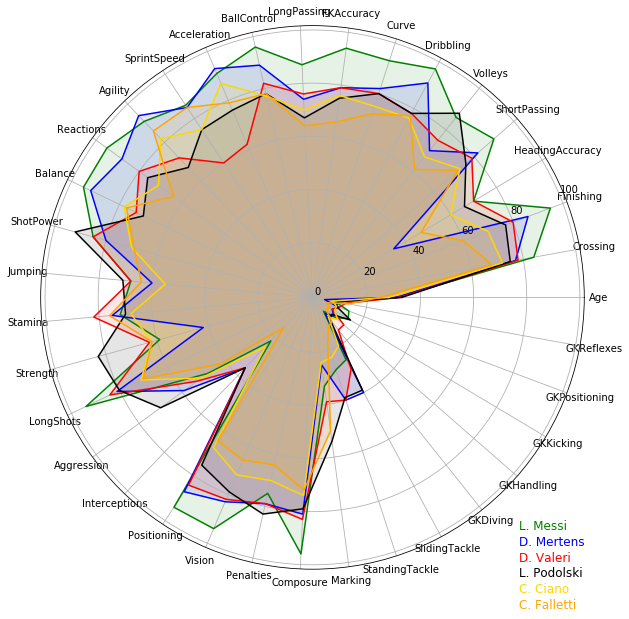

In [67]:
RadorChart(graph= standard_player, 
           abilities = rador_variables, 
           player_name = pd.Series(standard_player.index).values)

# Clustering

In [68]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")

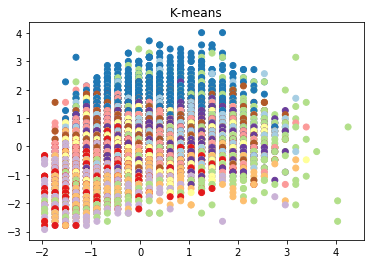

In [71]:
kmeans(predictors_scaled, 10)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

skillsPCA_labels = kmeans.fit_predict(skillsPCA)
In [12]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

#Clustering 1A: Visualize clustering-1 using TSNE (5D > 2D)
#The TSNE here is created from the 5D PCA components. In contrast, later on we will create the TSNE that is based on the original 34 variables. We will see later that the visualized 2D scatter doesn't look to different. However, the computational time required for TSNE from original vector space is much longer

#In [13]:


In [139]:
#Value binning based on 5 quantile groups
y_binned_quantile = pd.qcut(target_val,5, labels=[1,2,3,4,5])

In [141]:
from sklearn.manifold import TSNE

scaled = StandardScaler()
X = scaled.fit_transform(predictors_df)

Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = y_binned_quantile
dftsne.columns = ['x1','x2','cluster']



### Visualizing TSNE with points colored by Value bins (y_binned_quantile)

Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

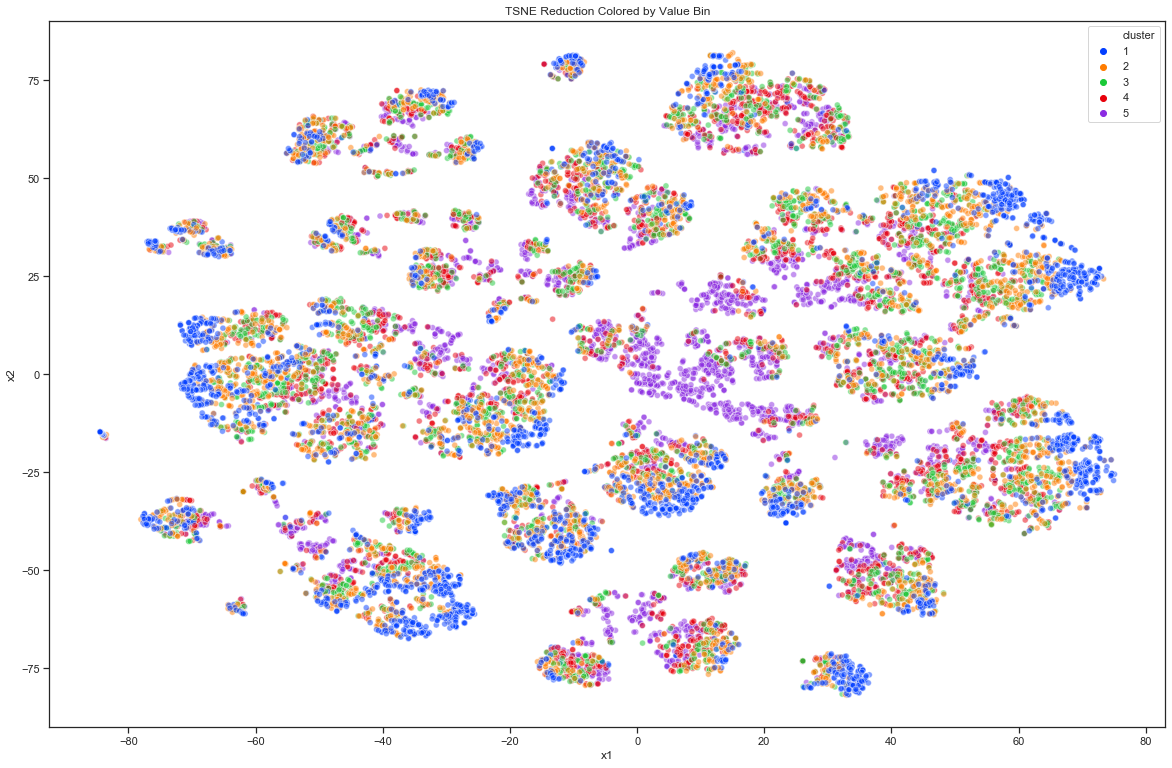

In [164]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,palette=cmap ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Bin')



### Let's try coloring TSNE using position group

In [154]:
dftsne['Position_Group_Labels'] = fifa.Position_Group

Text(0.5, 1.0, 'TSNE Reduction Colored by Position Group')

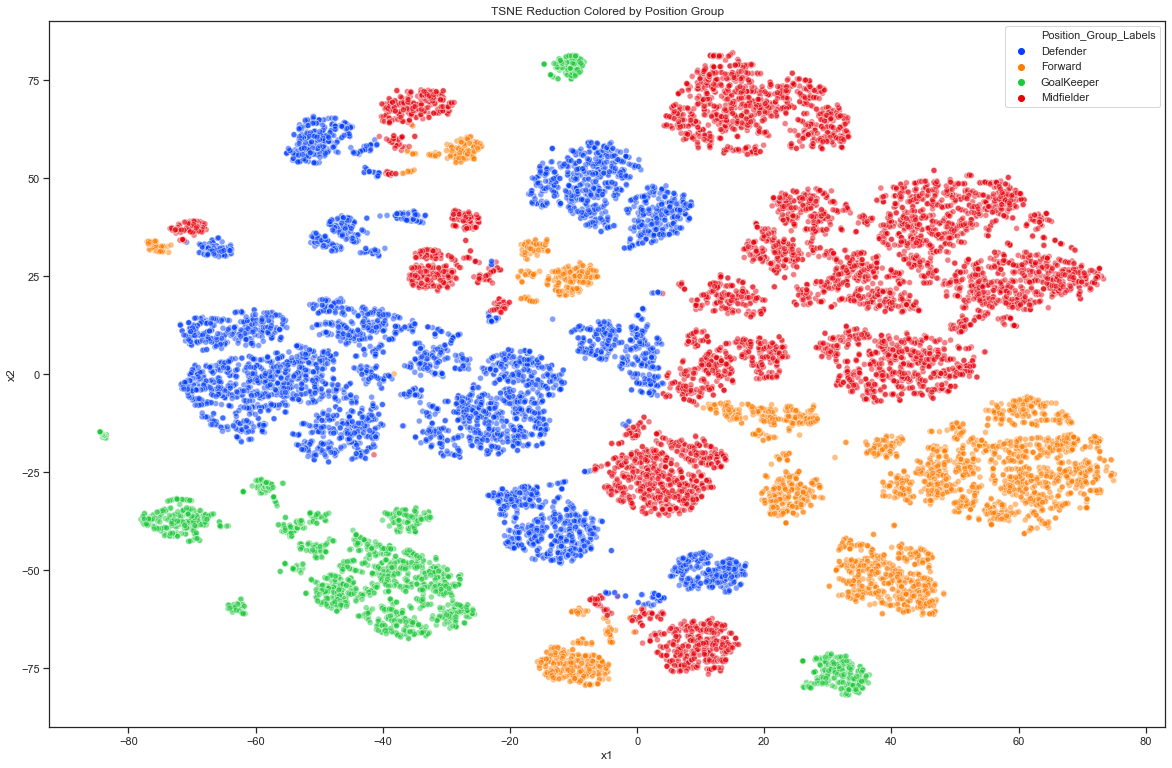

In [163]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Position_Group_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Position Group')


### Try by Continent

Text(0.5, 1.0, 'TSNE Reduction Colored by Continent')

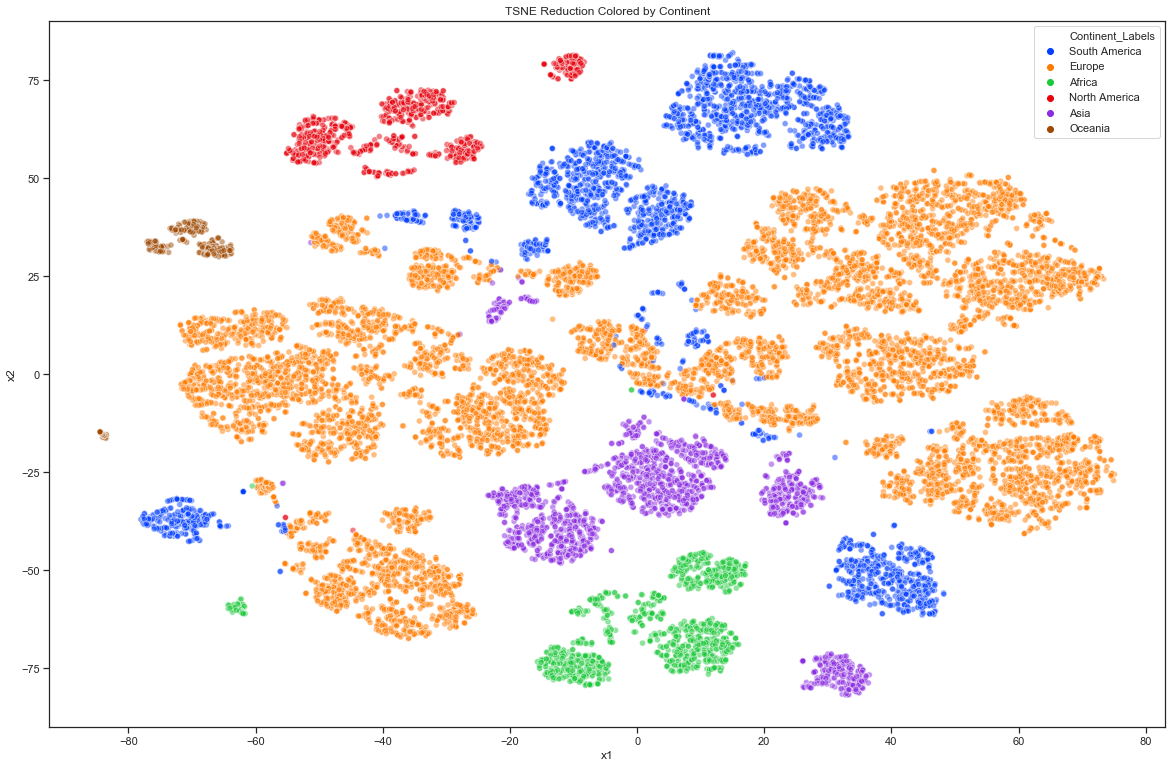

In [170]:
dftsne['Continent_Labels'] = fifa.Continent

fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Continent_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Continent')

In [0]:
numeric_fifa = fifa[['Age', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']]

#Limit to only popular clubs (reputation over 45)
numeric_fifa = numeric_fifa[fifa['Club_Reputation'] > 45]

#numeric_fifa.groupby(fifa['Club']).sum().sort_values(by = 'Overall', ascending = False)

numeric_fifa_byclub = numeric_fifa.groupby(fifa['Club']).sum()

#Drop limited NA rows
numeric_fifa_byclub.dropna(axis = 'rows', inplace = True)

#Get Values
numeric_values = numeric_fifa_byclub.values

#Get Labels for dendogram
club_labels = fifa.Club[fifa['Club_Reputation'] > 45].values


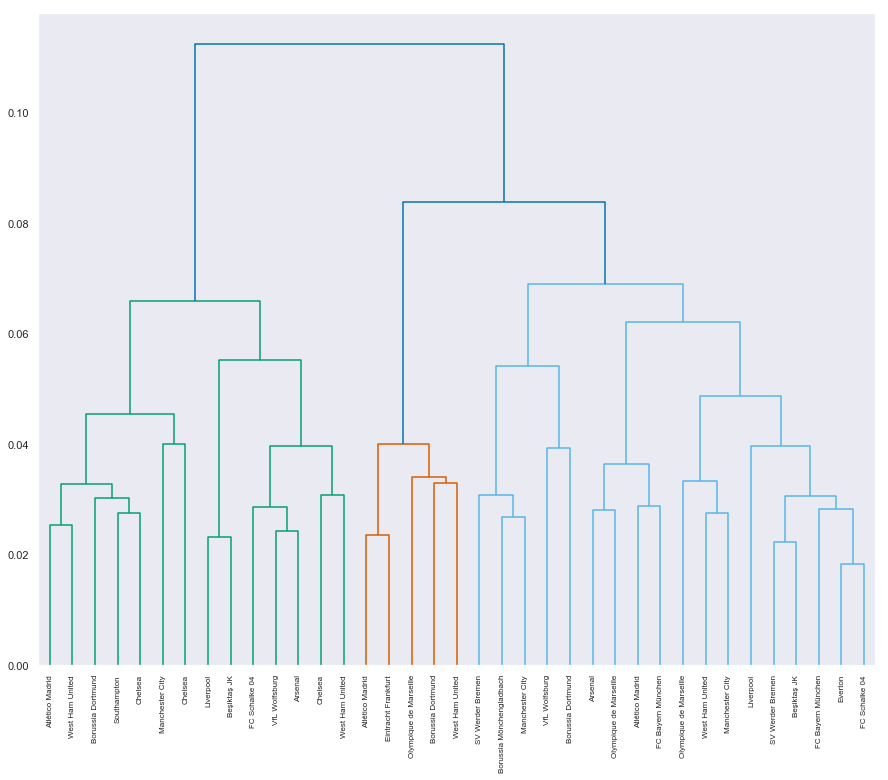

In [0]:
# Any Pre-processing needed?
normalized_numeric = normalize(numeric_values)
plt.figure(figsize=(15,12))

# Calculate the linkage: mergings
mergings = linkage(normalized_numeric, method= 'ward')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=club_labels,
    leaf_rotation=90.,
    leaf_font_size=8)


plt.show()

In [0]:
fifa.loc[:,['Club','International Reputation']].groupby('Club').sum().sort_values(by ='International Reputation',  ascending = False)

,International Reputation
Club,
FC Barcelona,74.0
FC Bayern München,73.0
Chelsea,70.0
Manchester United,69.0
Manchester City,69.0
Real Madrid,69.0
Arsenal,67.0
Paris Saint-Germain,67.0
Borussia Dortmund,66.0


# APPENDIX

## Defining an Undervalued Player

In [0]:
#Average time player stays at a team
#avg_stay = (fifa.Joined.mean()/365)*12
#avg_stay

23.415377860859216

In [0]:
#scaled = StandardScaler()

#Average Overall/Potential

#scaled_avg_overpot = scaled.fit_transform(np.array(avg_over_pot).reshape(-1,1))

#Scale Wage & Value
#scaled_wage = scaled.fit_transform(np.array(fifa.Wage).reshape(-1,1))
#scaled_value = scaled.fit_transform(np.array(fifa.Value).reshape(-1,1))

#Average of scaled
#scaled_avg_wagevalue = (scaled_wage+scaled_value)/2


#undervalued_score = scaled_avg_overpot/scaled_avg_wagevalue


#avg_over_pot = (fifa.Overall+fifa.Potential)/2

#avg_value_age = (fifa.Value+(fifa.Wage*avg_stay))/2

#undervalued_score = avg_over_pot/avg_value_age

#maxx = undervalued_score[undervalued_score != np.inf].max()
#undervalued_score.replace(np.inf,maxx,inplace=True)

#undervalued_score_scaled = scaled.fit_transform(np.array(undervalued_score).reshape(-1,1))

In [0]:
#fifa['undervalued_score'] = undervalued_score_scaled

In [0]:
#fifa.sort_values(by = 'undervalued_score', ascending = True).head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent,undervalued_score
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,South America,-0.765128
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,South America,-0.765016
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,Europe,-0.764652
5,5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,1,4.0,4.0,4.0,Normal,1,LF,10.0,2375,0,2,173,163,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2.121212,High,Medium,Forward,3,79.0,86.8,92.2,73.4,74.666667,27.666667,9.0,0,Europe,-0.764277
15,15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,2092,0,3.0,3.0,4.0,Normal,1,LF,21.0,1280,0,4,178,165,83,83,83,87,86,86,86,87,87,87,87,86,79,79,79,86,62,58,58,58,62,56,45,45,45,56,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0,2.520000,High,Medium,Forward,3,81.8,87.0,86.4,78.0,70.166667,21.000000,5.2,5,South America,-0.763890


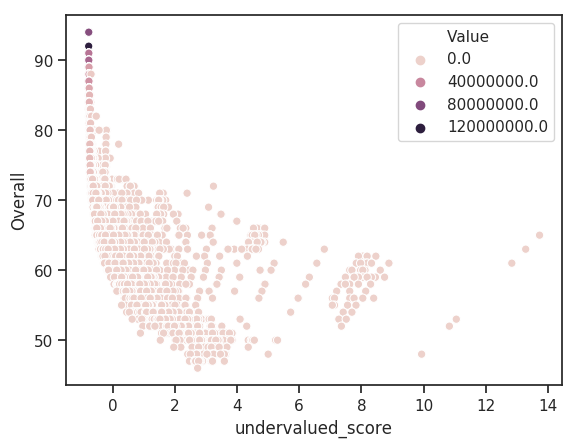

In [0]:
#sns.scatterplot(x ='undervalued_score', y = 'Overall', hue = 'Value', data = fifa)

In [ ]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#position_group_labels = le.fit_transform(fifa.Position_Group)
#